In [13]:
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from ga import GeneticAlgorithm

Ideia

Gerar um algoritmo genético para dado um time adversário fixo gerar um time melhor adequado capaz de vence-lo.

# Dados

pokedex
 - https://gist.github.com/armgilles/194bcff35001e7eb53a2a8b441e8b2c6
 - https://pokemondb.net/pokedex/all
 - https://bulbapedia.bulbagarden.net/wiki/Index_number
 - https://www.kaggle.com/datasets/rounakbanik/pokemon

matriz tipos
 - https://bulbapedia.bulbagarden.net/wiki/Type#Type-affected_game_mechanics
 - https://pokemondb.net/type

In [14]:
df = pd.read_csv("data/pokemon_dataset.csv")
# df.isnull().sum()
# df.nunique()
# df.dtypes
# df.describe()
df.fillna("NULL", inplace=True)
# df.sample(random_state=20)
# df.sample(random_state=20).to_dict(orient='records')[0]
# pokemon = df.sample(random_state=0).to_dict(orient='records')[0]
# pokemon = df.sample(random_state=20).to_dict(orient='records')[0]
# pokemon
df.head()

,pokedex_number,name,type1,type2,hp,attack_total,defense_total,speed,capture_rate,legendary,generation
0,1,Bulbasaur,Grass,Poison,45,114,114,45,45,False,1
1,2,Ivysaur,Grass,Poison,60,142,143,60,45,False,1
2,3,Venusaur,Grass,Poison,80,182,183,80,45,False,1
3,4,Charmander,Fire,NULL,39,112,93,65,45,False,1
4,5,Charmeleon,Fire,NULL,58,144,123,80,45,False,1


In [15]:
df_matriz = pd.read_csv("data/matriz_tipo.csv")
# df_matriz.isnull().sum()
# df_matriz.nunique()
# df_matriz.dtypes
# df_matriz.describe()
# df_matriz.set_index("tipo")["Fire"].to_dict()#["Bug"] # eficacia dos ataques dos outros tipos
df_matriz.head(10)

,tipo,Normal,Fighting,Flying,Poison,Ground,Rock,Bug,Ghost,Steel,Fire,Water,Grass,Electric,Psychic,Ice,Dragon,Dark,Fairy
0,Normal,1.0,1.0,1.0,1.0,1.0,0.5,1.0,0.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,Fighting,2.0,1.0,0.5,0.5,1.0,2.0,0.5,0.0,2.0,1.0,1.0,1.0,1.0,0.5,2.0,1.0,2.0,0.5
2,Flying,1.0,2.0,1.0,1.0,1.0,0.5,2.0,1.0,0.5,1.0,1.0,2.0,0.5,1.0,1.0,1.0,1.0,1.0
3,Poison,1.0,1.0,1.0,0.5,0.5,0.5,1.0,0.5,0.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0
4,Ground,1.0,1.0,0.0,2.0,1.0,2.0,0.5,1.0,2.0,2.0,1.0,0.5,2.0,1.0,1.0,1.0,1.0,1.0
5,Rock,1.0,0.5,2.0,1.0,0.5,1.0,2.0,1.0,0.5,2.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0
6,Bug,1.0,0.5,0.5,0.5,1.0,1.0,1.0,0.5,0.5,0.5,1.0,2.0,1.0,2.0,1.0,1.0,2.0,0.5
7,Ghost,0.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,0.5,1.0
8,Steel,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,0.5,0.5,0.5,1.0,0.5,1.0,2.0,1.0,1.0,2.0
9,Fire,1.0,1.0,1.0,1.0,1.0,0.5,2.0,1.0,2.0,0.5,0.5,2.0,1.0,1.0,2.0,0.5,1.0,1.0


# Caracteriazação do problema

um time será caracterizado de 6 pokemons

- assume-se que todos os ataques dos pokemons são do seu respectivo tipo. Isto é, um pokemon de fogo somente tem ataques de tipo fogo.
- em caso de pokemons de dois tipos, haverá ataques de seus tipos. Isto é, pokemon de fogo e voador terá ataques de fogo e voador.
- os ataques e sp. ataques foram somados afim de criar o ataque total
- as defesas e sp. defesas doram somados afim de criar a defesa total

## Fitness

https://bulbapedia.bulbagarden.net/wiki/Damage

# Algoritmo

## A codificação de um indivíduo em termos de seu genótipo e fenótipo
### genótipo:
um par ordenado (x,y)
poderia ser uma vetor binário que representasse uma função expandida de aproximação para os valores

### fenótipo:
os proprios valores do um ordenado (x,y)

## A função de fitness utilizada
a propria função de Himmelblau

## Parametros

In [16]:
## Apresente os parâmetros (tamanho da população, taxa de mutação, quantidade de gerações) utilizados para executar o algoritmo;
tamanho_populacao = 20
taxa_mutacao=0.7
numero_geracoes=15

## Code

In [17]:
ag = GeneticAlgorithm(population_size= tamanho_populacao)

In [18]:
ag.run(max_generations=numero_geracoes, mutation_rate=taxa_mutacao)

Generation 0: Fittest individual has fitness 271.3738771532898
Generation 1: Fittest individual has fitness 326.35727949664647
Generation 2: Fittest individual has fitness 295.69255263924157
Generation 3: Fittest individual has fitness 319.8593700304986
Generation 4: Fittest individual has fitness 347.70529071338746
Generation 5: Fittest individual has fitness 214.28092050478116
Generation 6: Fittest individual has fitness 198.60421465393748
Generation 7: Fittest individual has fitness 222.18597251549076
Generation 8: Fittest individual has fitness 371.5793132611202
Generation 9: Fittest individual has fitness 233.51471774890513
Generation 10: Fittest individual has fitness 232.13134678967378
Generation 11: Fittest individual has fitness 298.8670486260478
Generation 12: Fittest individual has fitness 366.6852240091195
Generation 13: Fittest individual has fitness 331.70809076251385
Generation 14: Fittest individual has fitness 222.32393542367328


In [19]:
for x in ag.oponent_team.team:
    print(x)

Individual(pokedex_number=125, name=Electabuzz, type1=Electric, type2=None)
Individual(pokedex_number=13, name=Weedle, type1=Bug, type2=Poison)
Individual(pokedex_number=187, name=Hoppip, type1=Grass, type2=Flying)
Individual(pokedex_number=549, name=Lilligant, type1=Grass, type2=None)
Individual(pokedex_number=656, name=Froakie, type1=Water, type2=None)
Individual(pokedex_number=268, name=Cascoon, type1=Bug, type2=None)


In [20]:
ag.historical_fitness

[TeamIndividual(team=[Individual(pokedex_number=26, name=Raichu, type1=Electric, type2=None), Individual(pokedex_number=70, name=Weepinbell, type1=Grass, type2=Poison), Individual(pokedex_number=249, name=Lugia, type1=Psychic, type2=Flying), Individual(pokedex_number=599, name=Klink, type1=Steel, type2=None), Individual(pokedex_number=51, name=Dugtrio, type1=Ground, type2=None), Individual(pokedex_number=145, name=Zapdos, type1=Electric, type2=Flying)], fitness=542.7477543065796),
 TeamIndividual(team=[Individual(pokedex_number=142, name=Aerodactyl, type1=Rock, type2=Flying), Individual(pokedex_number=288, name=Vigoroth, type1=Normal, type2=None), Individual(pokedex_number=576, name=Gothitelle, type1=Psychic, type2=None), Individual(pokedex_number=91, name=Cloyster, type1=Water, type2=Ice), Individual(pokedex_number=282, name=Gardevoir, type1=Psychic, type2=Fairy), Individual(pokedex_number=581, name=Swanna, type1=Water, type2=Flying)], fitness=326.35727949664647),
 TeamIndividual(team

In [21]:
for x in ag.fittest_team.team:
    print(x)
print(ag.fittest_team.fitness)

Individual(pokedex_number=26, name=Raichu, type1=Electric, type2=None)
Individual(pokedex_number=70, name=Weepinbell, type1=Grass, type2=Poison)
Individual(pokedex_number=249, name=Lugia, type1=Psychic, type2=Flying)
Individual(pokedex_number=599, name=Klink, type1=Steel, type2=None)
Individual(pokedex_number=51, name=Dugtrio, type1=Ground, type2=None)
Individual(pokedex_number=145, name=Zapdos, type1=Electric, type2=Flying)
542.7477543065796


# Simulação

In [ ]:
tamanho_populacao = 20
taxa_mutacao=0.7
numero_geracoes=15

ag = GeneticAlgorithm(population_size= tamanho_populacao)
ag.run(max_generations=numero_geracoes, mutation_rate=taxa_mutacao)

In [11]:
resultados = []
for x in ag.historical_fitness:
    resultados.append(x.fitness)

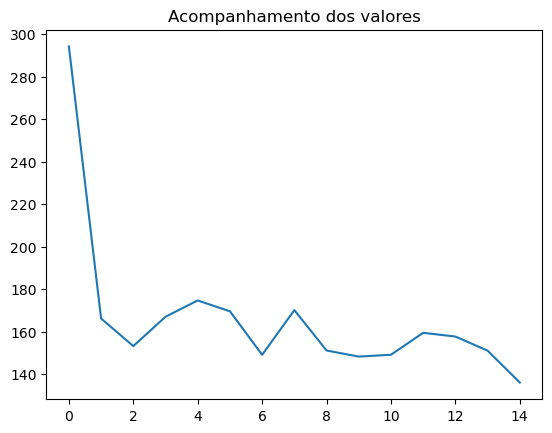

In [12]:
## Inclua um gráfico mostrando a variação do fitness médio e fitness máximo ao longo das gerações;
plt.plot(resultados)
plt.title("Acompanhamento dos valores")
plt.show()

# Considerações

podiamos elaborar uma abordagem de aprendizado por reforço em que gerariamos o time e simulariamos a batalha (sequancial, randomica ou por affinidade de atributos) e teriamos os resultados.
seria um abordagem mais simples de implementação.

porem optei a abordagem genetica pois gostaria de simular uma evolução natural por exercitar a habilidade e que será um tipo de algoritmo que aplicarei em futuras aplicações.